# Import stuff

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Read in the data

In [13]:
# Load the data
def read_visits(shards=range(3)):
    """
    Args:
      shards:  A subset of the integers 0-9, indicating which data shards
        should be read in.

    Returns:
      A pandas DataFrame
    """
    data = pd.DataFrame()
    dname = "/Users/stevescott/Downloads/demographics-2"
    for which_part in shards:
        fname = f"part-00000000000{which_part}.csv.gz"
        fname = os.path.join(dname, fname)
        print(f"reading {fname}")
        shard = pd.read_csv(fname)
        data = data.append(shard)
    return data


In [14]:
data = read_visits([0, 1, 2])
# data = read_visits(np.arange(8))

reading /Users/stevescott/Downloads/demographics-2/part-000000000000.csv.gz
reading /Users/stevescott/Downloads/demographics-2/part-000000000001.csv.gz
reading /Users/stevescott/Downloads/demographics-2/part-000000000002.csv.gz


In [15]:
data.shape

(26202278, 3)

In [16]:
data.head()

,estid,domain,visits
0,ZGoABmED6FQAAAAIGuINAw==,ol.mingpao.com,7
1,CiSABF9bX/wAAAATA00AAw==,legacy.com,4
2,ZGeAAmEa2rIAAAAIfHT1Aw==,news.creaders.net,4
3,ZGUACGE560YAAAAIS7CbAw==,madamenoire.com,2
4,ZGgAB2EWmE8AAAAIEoDNAw==,clutchpoints.com,2


In [17]:
data = data.sort_values("visits", ascending=False)
data.head()

,estid,domain,visits
3505500,ZHwAA2E5MG0AAAAJLgIcAw==,fortnitetracker.com,365438
4285346,ZHyAAmFejEIAAAAIF7S9Aw==,fortnitetracker.com,208960
2458814,ZGMABmCDUBUAAAAIG/Z8Aw==,diariolibre.com,59285
5892215,ZGcAAGDxveUAAAAIMPZGAw==,tigernet.com,56902
2230026,ZGwABWDbRDQAAAAOEAeFAw==,tigernet.com,49916


In [20]:
# Get the number of times each estid appears in the data.
unique_visit_counts = data.value_counts("estid")

In [21]:
unique_visit_counts.head()

estid
ZGIABGFm3EYAAAAIG4iRAw==    25
ZGwAAmFw5RsAAAAJdnGgAw==    24
ZHQABWGe0YkAAAAIPJ1iAw==    20
ZGUABGGub/QAAAAINidgAw==    20
ZGoABmGoCeMAAAAIFowvAw==    20
dtype: int64

In [22]:
# This is the number of times we saw an estid once, twice, ...
unique_visit_counts.value_counts().sort_index()

1     12489654
2      5111863
3       806210
4       176638
5        45196
6        13034
7         4387
8         1587
9          731
10         362
11         193
12         125
13          66
14          42
15          12
16          17
17          10
18           5
19           2
20           3
24           1
25           1
dtype: int64

In [23]:
# Check out the guy who showed up to 25 different domains.
data[data.estid=="ZGIABGFm3EYAAAAIG4iRAw=="]

,estid,domain,visits
7566212,ZGIABGFm3EYAAAAIG4iRAw==,lessonslearnedinlife.com,9
4835721,ZGIABGFm3EYAAAAIG4iRAw==,currentobituary.com,7
6157544,ZGIABGFm3EYAAAAIG4iRAw==,passportamerica.com,6
1669789,ZGIABGFm3EYAAAAIG4iRAw==,racesonline.com,6
7952061,ZGIABGFm3EYAAAAIG4iRAw==,appass.com,6
720500,ZGIABGFm3EYAAAAIG4iRAw==,bloomsbury.com,6
145265,ZGIABGFm3EYAAAAIG4iRAw==,avid.com,6
45040,ZGIABGFm3EYAAAAIG4iRAw==,bmi.com,6
5548414,ZGIABGFm3EYAAAAIG4iRAw==,mcmenamins.com,6
1001091,ZGIABGFm3EYAAAAIG4iRAw==,wheeldecide.com,6


<AxesSubplot:>

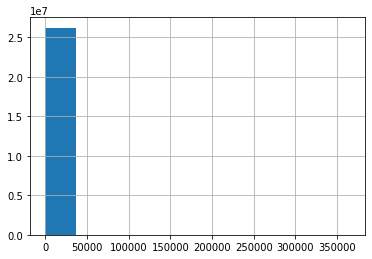

In [19]:
data.visits.hist()

<AxesSubplot:>

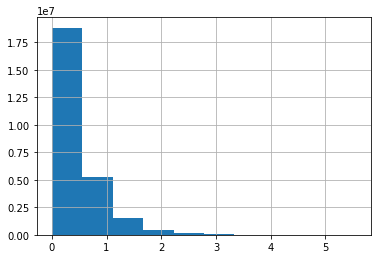

In [18]:
np.log10(data.visits).hist()

In [24]:
total_visits_by_estid = data.loc[:, ("estid", "visits")].groupby("estid").sum()



In [25]:
total_visits_by_estid.sort_values("visits", ascending=False)

,visits
estid,
ZGwAB2EdKZsAAAAIF0RUAw==,155195
ZHyAAmFejEIAAAAIF7S9Aw==,26942
ZGYAAWGA+9kAAAAIDYEjAw==,7300
ZGgACGE7dJgAAAAID4TaAw==,3733
ZHUAA2FoUNUAAAAIETzpAw==,3228
...,...
ZGYAAGFzVugAAAAIawPwAw==,1
ZGYAAGFzVr4AAAAIav5TAw==,1
ZGYAAGFzVqwAAAAIFQ0XAw==,1


## Check out the ID's with many visits.  How many sites do they visit?  Usually just one.

In [34]:
data[data.estid=="ZGYAAWGA+9kAAAAIDYEjAw=="]

,estid,domain,visits
9316,ZGYAAWGA+9kAAAAIDYEjAw==,jump.mingpao.com,7300


In [35]:
data[data.estid=="ZGgACGE7dJgAAAAID4TaAw=="]

,estid,domain,visits
41076,ZGgACGE7dJgAAAAID4TaAw==,coingecko.com,3733
